<a href="https://colab.research.google.com/github/yk-Jeong/DS_study/blob/main/3%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [376]:
import os

if os.name == 'posix':
  plt.rc("font", family="AppleGothic")
else:
  plt.rc('font', family='NanumGothic')

plt.rc("axes", unicode_minus=False)

In [377]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"

In [378]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [379]:
%config InlneBackend.figure_format = 'retina'

In [380]:
df = pd.read_csv("/content/NHIS_OPEN_GJ_2017.CSV", encoding='cp949')

데이터의 개형 및 샘플 추출 

In [381]:
df.shape

(1000000, 34)

In [382]:
df.head() # cf) df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [383]:
# 랜덤하게 한 개의 데이터만 추출 
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
81568,2017,81569,2,9,46,150.0,45.0,56.0,1.0,1.2,...,20.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


데이터 정보 확인

In [384]:
df.info(), df.dtypes, df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

(None, 기준년도              int64
 가입자일련번호           int64
 성별코드              int64
 연령대코드(5세단위)       int64
 시도코드              int64
 신장(5Cm단위)       float64
 체중(5Kg 단위)      float64
 허리둘레            float64
 시력(좌)           float64
 시력(우)           float64
 청력(좌)           float64
 청력(우)           float64
 수축기혈압           float64
 이완기혈압           float64
 식전혈당(공복혈당)      float64
 총콜레스테롤          float64
 트리글리세라이드        float64
 HDL콜레스테롤        float64
 LDL콜레스테롤        float64
 혈색소             float64
 요단백             float64
 혈청크레아티닌         float64
 (혈청지오티)AST      float64
 (혈청지오티)ALT      float64
 감마지티피           float64
 흡연상태            float64
 음주여부            float64
 구강검진 수검여부         int64
 치아우식증유무         float64
 결손치유무           float64
 치아마모증유무         float64
 제3대구치(사랑니)이상    float64
 치석              float64
 데이터공개일자           int64
 dtype: object, Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
        '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '

결측치 확인

In [385]:
df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [386]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

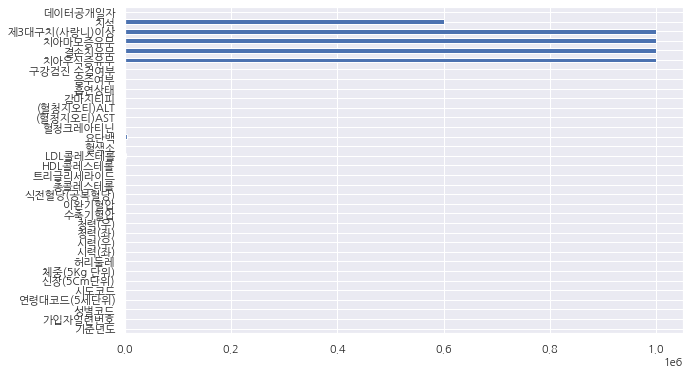

In [387]:
df.isnull().sum().plot.barh(figsize=(10, 6))

In [388]:
df['(혈청지오티)ALT']

0         41.0
1         13.0
2         62.0
3         24.0
4         62.0
          ... 
999995    11.0
999996    11.0
999997    13.0
999998    30.0
999999    20.0
Name: (혈청지오티)ALT, Length: 1000000, dtype: float64

In [389]:
# 2개 이상의 컬럼을 가져올 때는 리스트로 감싸줄 것 

df[['(혈청지오티)ALT', '(혈청지오티)AST']]

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0
...,...,...
999995,11.0,18.0
999996,11.0,21.0
999997,13.0,23.0
999998,30.0,28.0


In [390]:
df['(혈청지오티)ALT'].head()

0    41.0
1    13.0
2    62.0
3    24.0
4    62.0
Name: (혈청지오티)ALT, dtype: float64

In [391]:
df[['(혈청지오티)ALT', '(혈청지오티)AST']].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0


In [392]:
# 기술통계량

df[['(혈청지오티)ALT', '(혈청지오티)AST']].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


In [393]:
df['성별코드'].value_counts()

1    531172
2    468828
Name: 성별코드, dtype: int64

In [394]:
df['흡연상태'].value_counts()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

### 4.4. groupby와 pivot table 

4.4.1 grouby 

In [395]:
df.groupby(['성별코드']).count()

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,531172,531172,531172,531172,531098,531098,531102,531047,531055,531064,...,531154,531120,530976,531172,0,0,0,0,230156,531172
2,468828,468828,468828,468828,468640,468634,468458,468665,468666,468694,...,468801,468720,468499,468828,0,0,0,0,168592,468828


In [396]:
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [397]:
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [398]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [399]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe

<bound method SeriesGroupBy.describe of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7efcdcf74e50>>

In [400]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

4.4.2. pivot table

- 연산을 하지 않고 데이터의 구조를 바꾸고자 할 때 사용 
- 연산속도가 groupby보다 빠름

In [401]:
df.pivot

<bound method DataFrame.pivot of         기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0       2017        1     1           13    46      170.0        65.0  91.0   
1       2017        2     2            8    41      150.0        45.0  73.4   
2       2017        3     1            8    45      175.0        75.0  94.0   
3       2017        4     2           12    11      155.0        55.0  67.5   
4       2017        5     1            8    41      175.0        75.0  93.0   
...      ...      ...   ...          ...   ...        ...         ...   ...   
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(

In [402]:
df.pivot_table(index = '성별코드', values = '가입자일련번호', aggfunc='count')

,가입자일련번호
성별코드,
1,531172
2,468828


In [403]:
df.pivot_table(index = '음주여부', values = '가입자일련번호', aggfunc='count')

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [404]:
df.pivot_table(index = '음주여부', values = '가입자일련번호', aggfunc='count')

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [405]:
df.pivot_table(index = '음주여부', values = '감마지티피')

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [406]:
pd.pivot_table(df, index='음주여부', values='감마지티피', aggfunc=['mean', 'median'])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [407]:
pd.pivot_table(df, index ='음주여부', values='감마지티피', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [408]:
pd.pivot_table(df, index=['음주여부', '성별코드'], values='감마지티피', aggfunc='describe')

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     2     13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
1.0  1     24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
     2     13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

### 4.5. 히스토그램

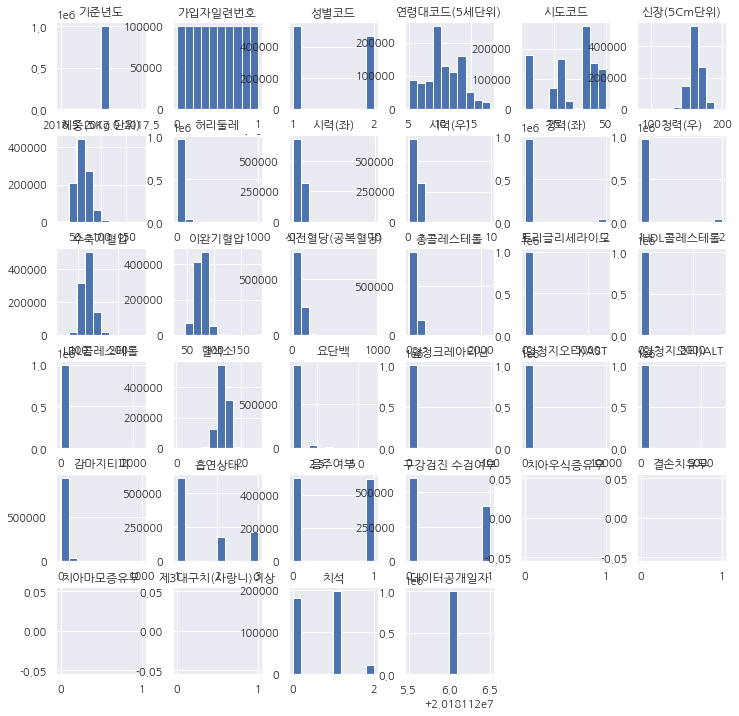

In [409]:
h = df.hist(figsize=(12, 12))

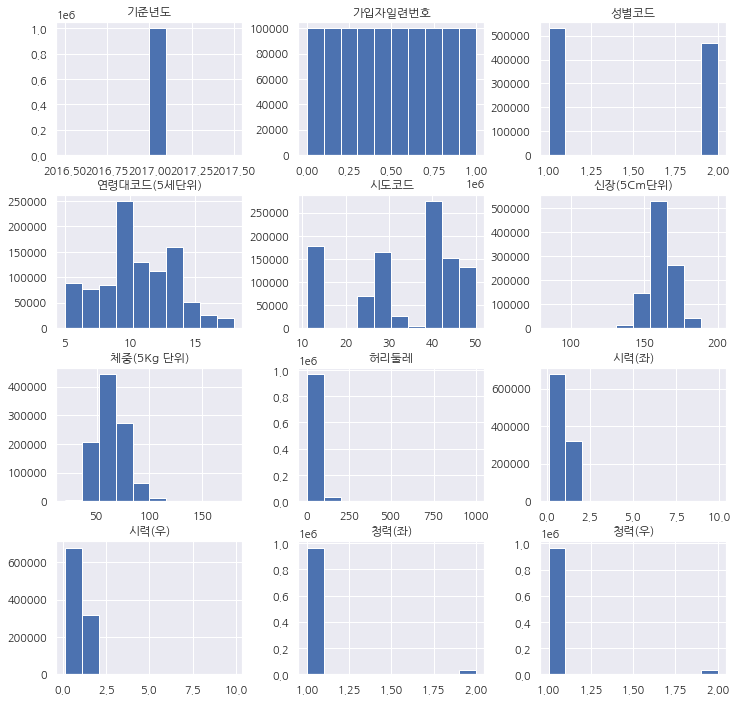

In [410]:
# 특정한 

h = df.iloc[:, :12].hist(figsize=(12, 12))

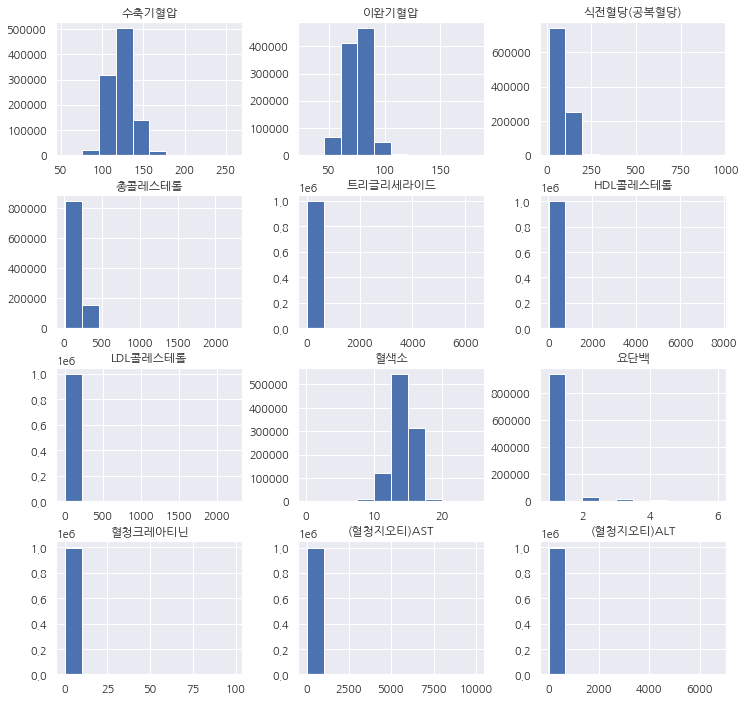

In [411]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12))

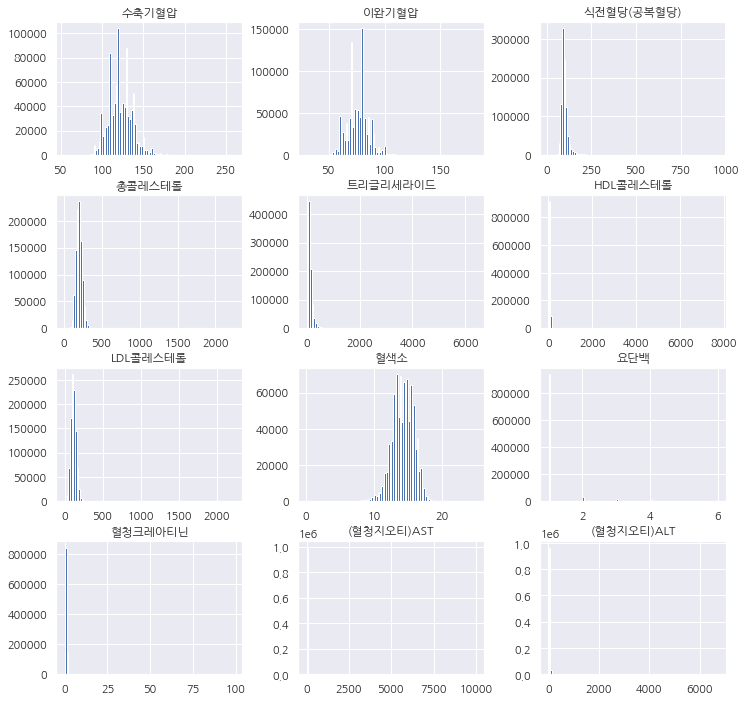

In [412]:
# 막대 개수 옵션

h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

히스토그램은 연속된 데이터를 카테고리형으로 만든다는 특성이 있음 

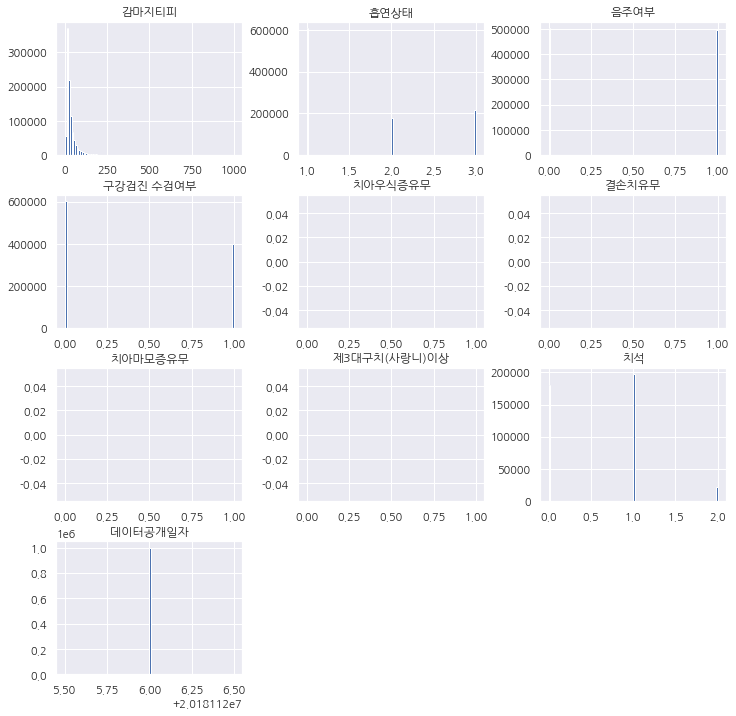

In [413]:
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=100)

### 4.6 seaborn, countplot 

In [414]:
# 표본을 랜덤으로 추출

df_sample = df.sample(1000, random_state=1)
df_sample

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
276826,2017,276827,2,12,11,155.0,85.0,113.0,0.7,1.0,...,35.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
849425,2017,849426,2,15,11,155.0,45.0,73.0,0.5,0.4,...,19.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
504499,2017,504500,1,11,47,170.0,45.0,63.0,0.7,0.4,...,15.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
601054,2017,601055,2,16,26,150.0,50.0,77.0,0.4,0.3,...,13.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
980221,2017,980222,2,13,41,150.0,65.0,95.0,1.0,0.8,...,265.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2017,890014,2,11,29,155.0,50.0,65.1,1.0,0.8,...,22.0,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
875389,2017,875390,2,9,11,155.0,45.0,66.5,0.9,0.8,...,12.0,1.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
358458,2017,358459,2,11,11,160.0,50.0,72.0,0.9,0.8,...,11.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
808228,2017,808229,1,9,48,175.0,65.0,75.2,1.2,1.2,...,122.0,3.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126


count bar plot

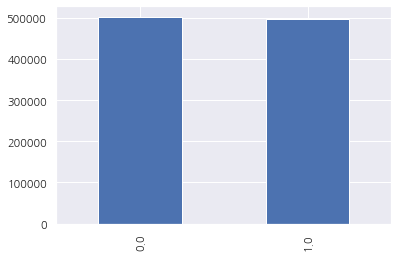

In [415]:
df['음주여부'].value_counts().plot.bar()

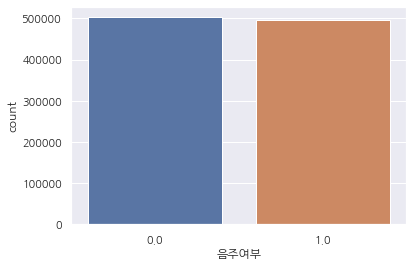

In [416]:
sns.countplot(x='음주여부', data=df)

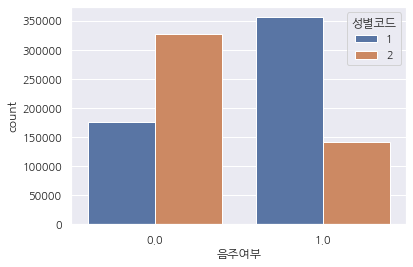

In [417]:
sns.countplot(x='음주여부', data=df, hue='성별코드')

In [418]:
sns.set(font_scale=1, font='NanumGothic')

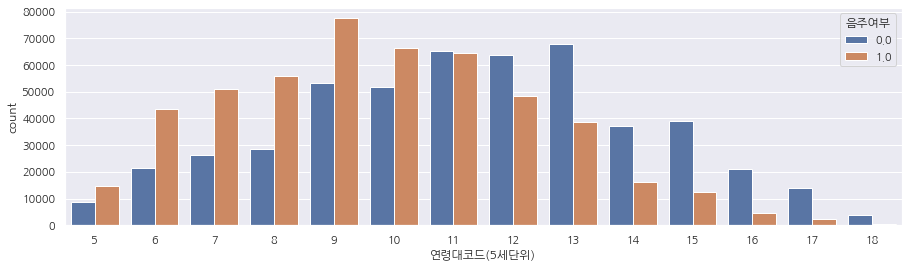

In [419]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='연령대코드(5세단위)', hue='음주여부')

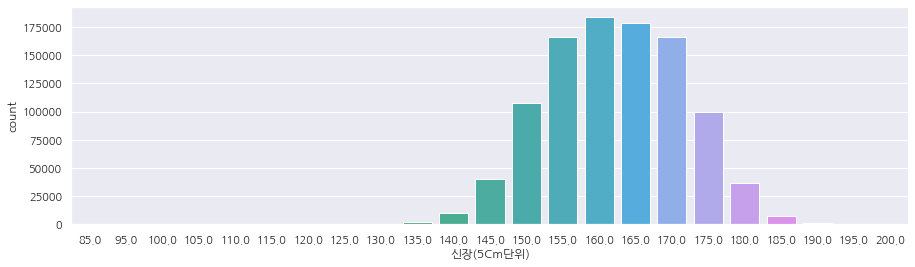

In [420]:
# 왜 갑자기 색이 예뻐졌는지 알 수가 없군

plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='신장(5Cm단위)')

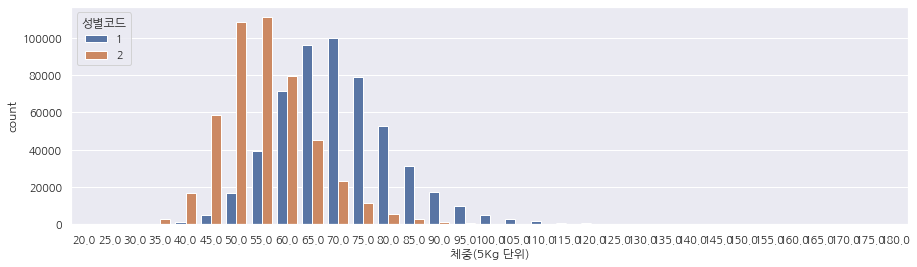

In [421]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue='성별코드')

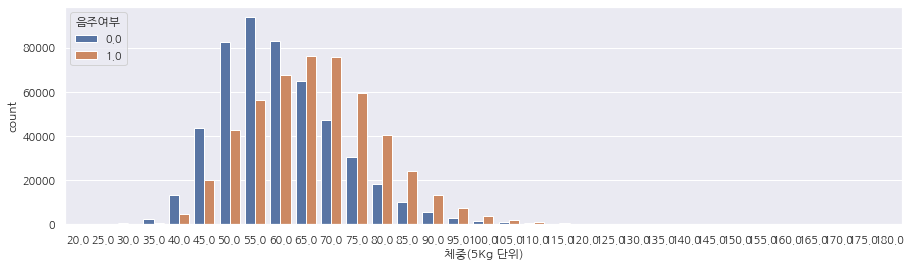

In [422]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='체중(5Kg 단위)', hue='음주여부')

### 4.7. sns.barplot()

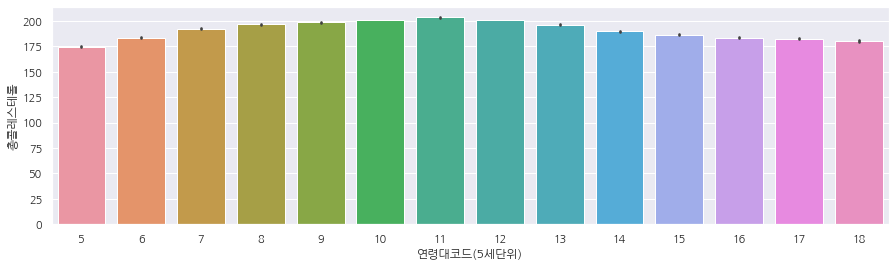

In [423]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤")

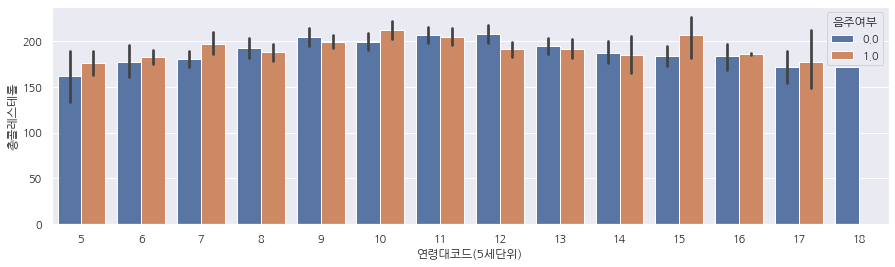

In [424]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue='음주여부')

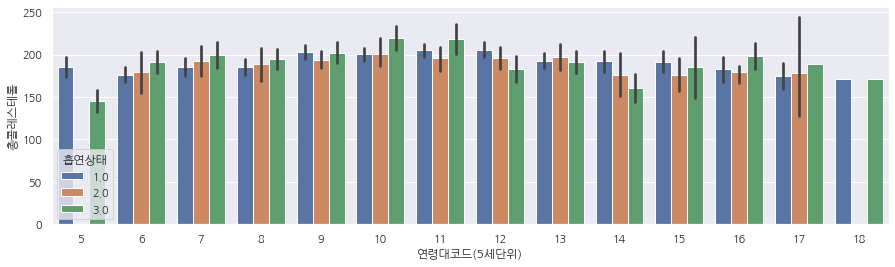

In [425]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', hue='흡연상태')

신뢰구간

- ci 옵션으로 줄 수 있음

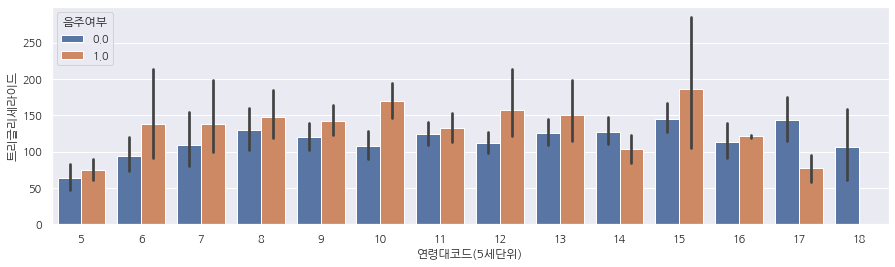

In [426]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue='음주여부', ci=95)

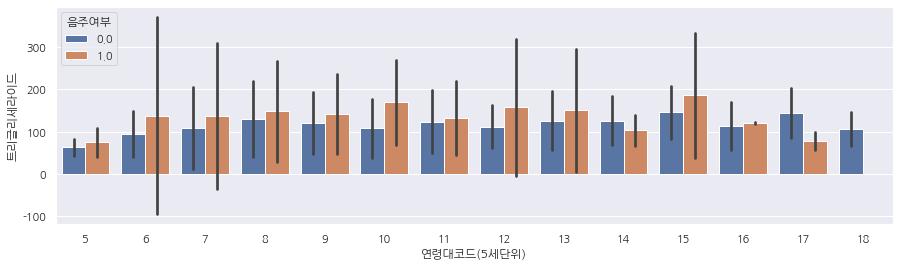

In [427]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='트리글리세라이드', hue='음주여부', ci='sd')

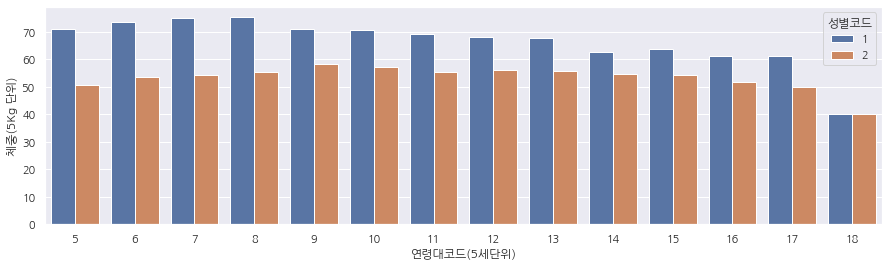

In [428]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='성별코드', ci=None)

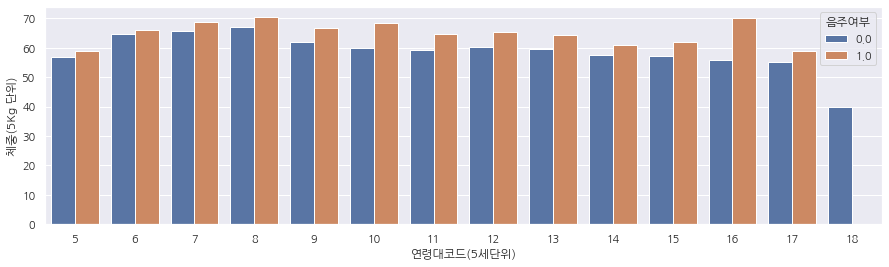

In [429]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci=None)

### 4.8.

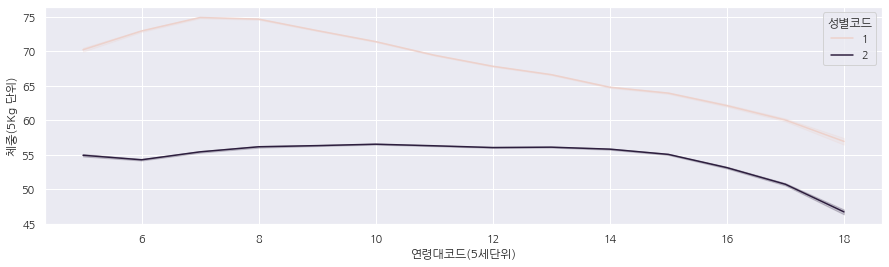

In [430]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='성별코드')

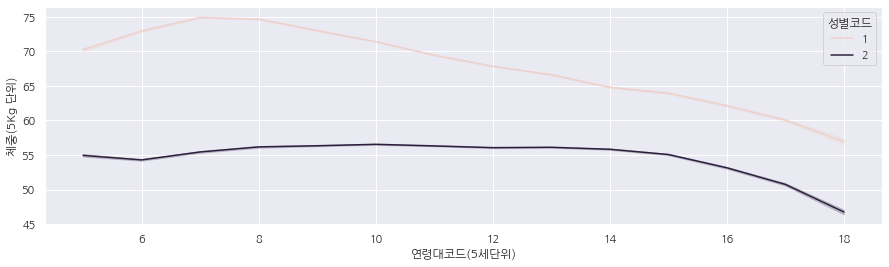

In [431]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='성별코드')

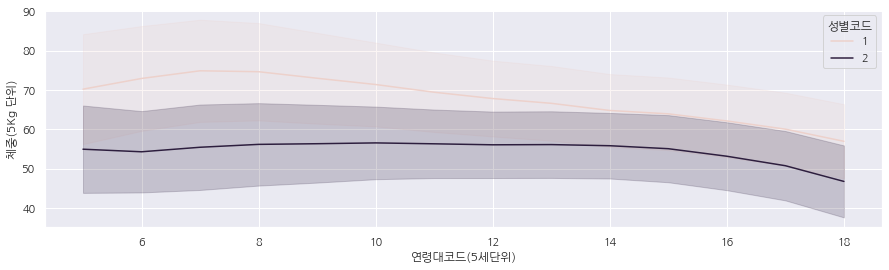

In [432]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='성별코드', ci='sd')

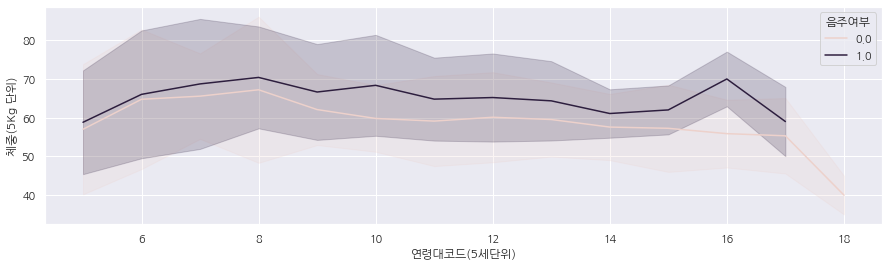

In [433]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부', ci='sd')

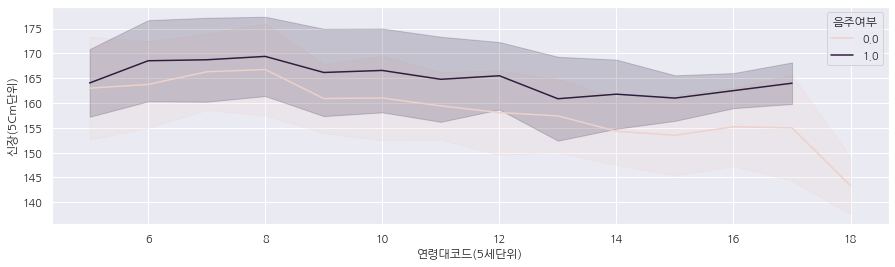

In [434]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', ci='sd')

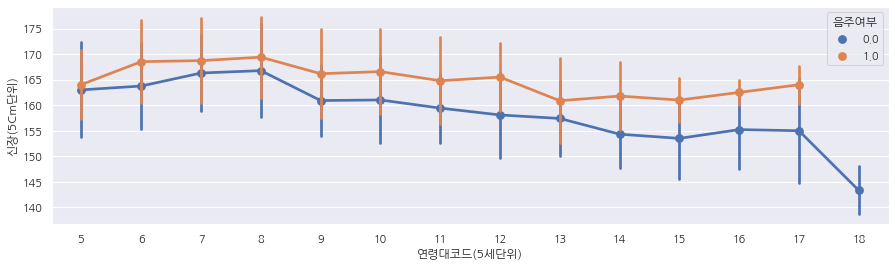

In [435]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', ci='sd')

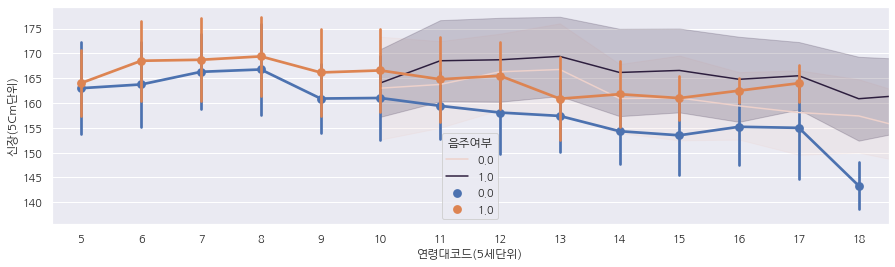

In [436]:
# 그래프 함께 그리기 

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', ci='sd')
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', ci='sd')

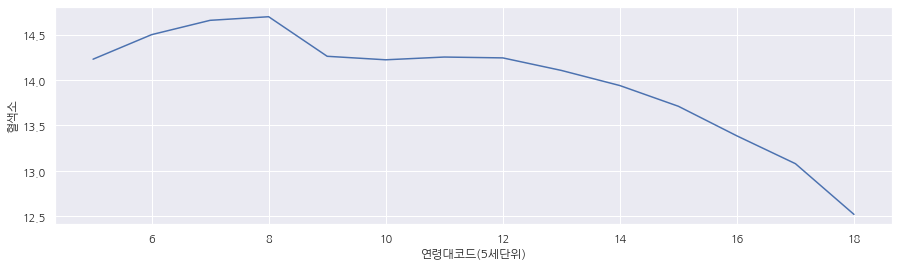

In [437]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y="혈색소", ci=None)

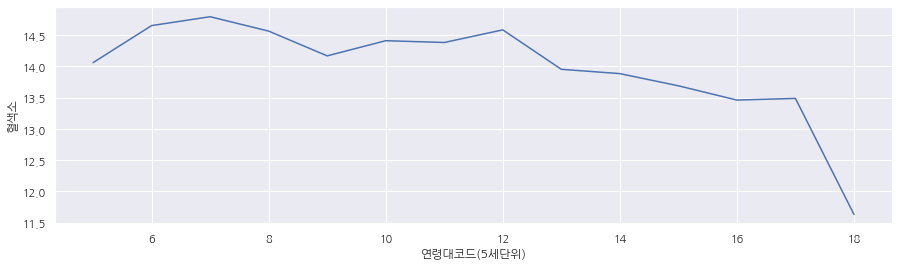

In [438]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y="혈색소", ci=None)

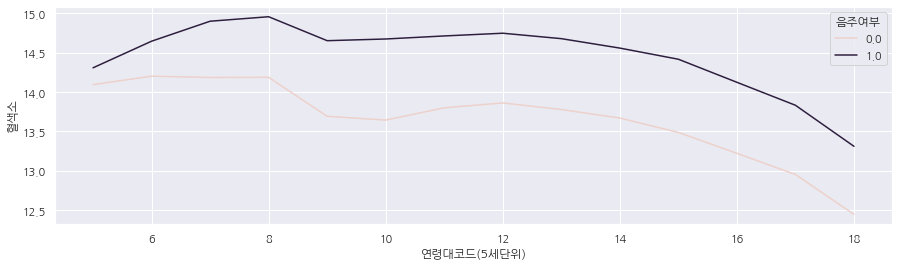

In [439]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', ci=None)

### 4.9 boxplot, violinplot

boxplot

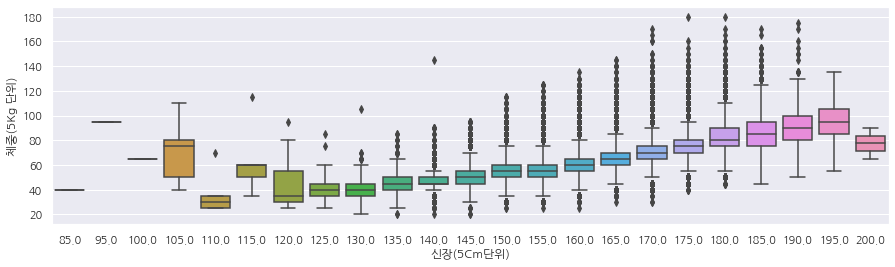

In [440]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x='신장(5Cm단위)', y='체중(5Kg 단위)')

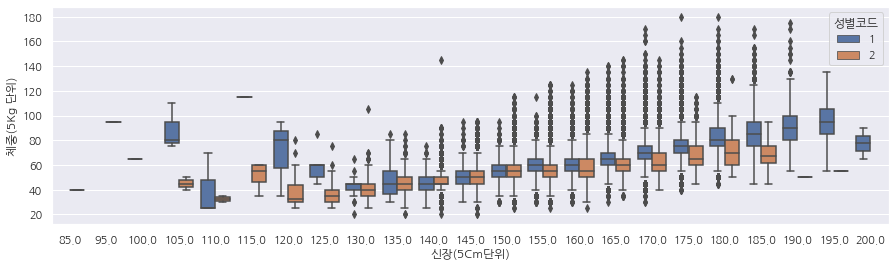

In [441]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='성별코드')

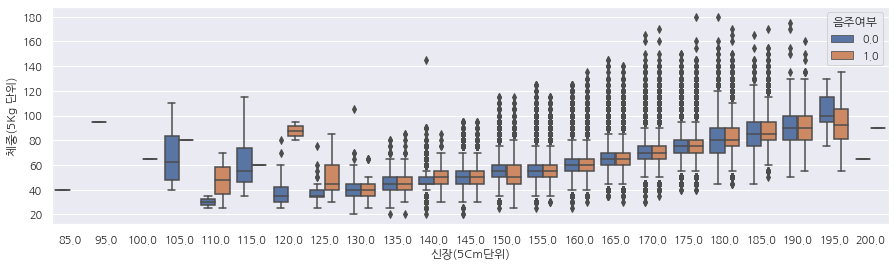

In [442]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부')

violinplot

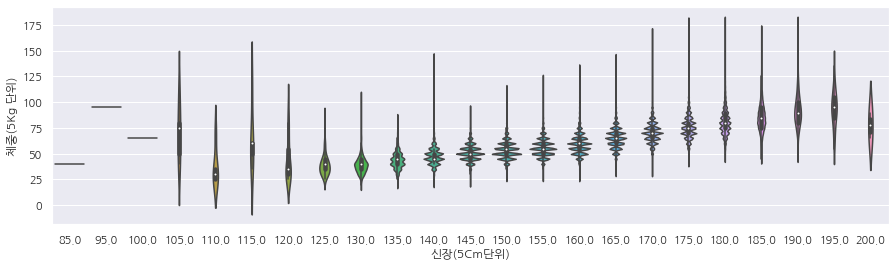

In [443]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x='신장(5Cm단위)', y='체중(5Kg 단위)')

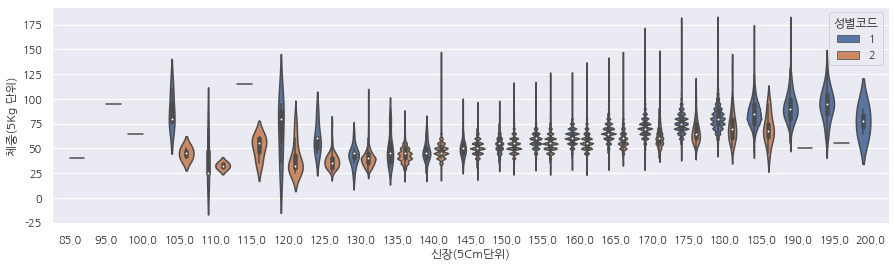

In [444]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='성별코드')

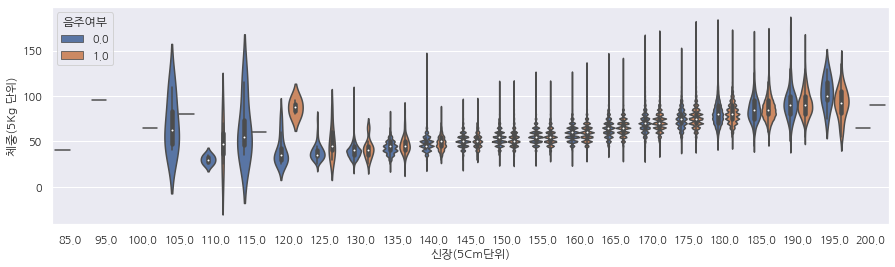

In [445]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부')

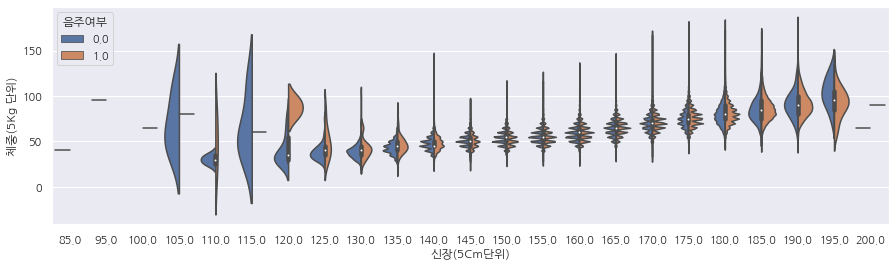

In [446]:
# split=True: 두 개의 데이터를 양옆으로 붙여 확인

plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부', split=True)

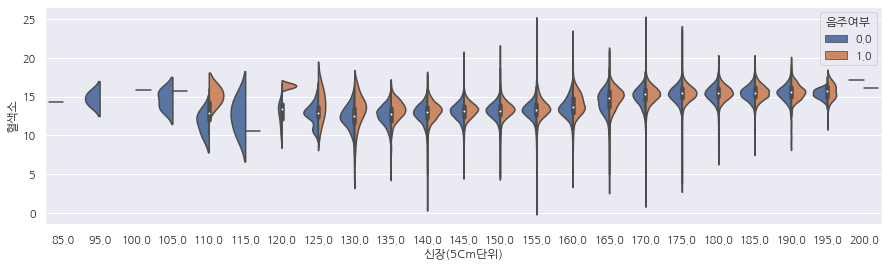

In [447]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x='신장(5Cm단위)', y='혈색소', hue='음주여부', split=True)

swarm plot(산점도)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; y

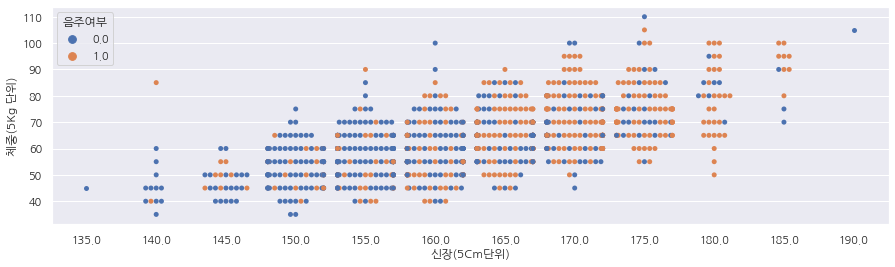

In [448]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


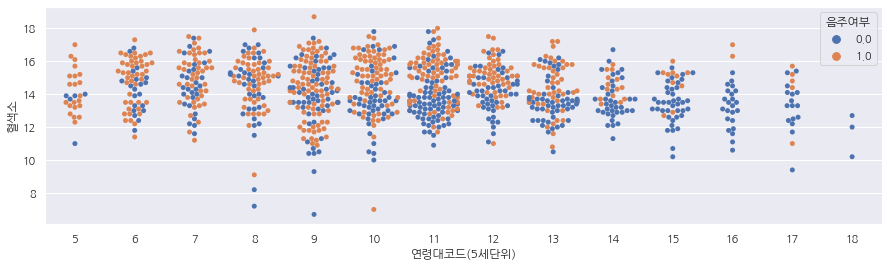

In [449]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you 

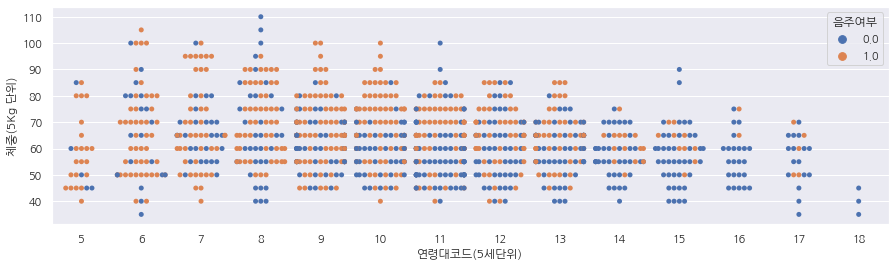

In [450]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg 단위)', hue='음주여부')

lmplot

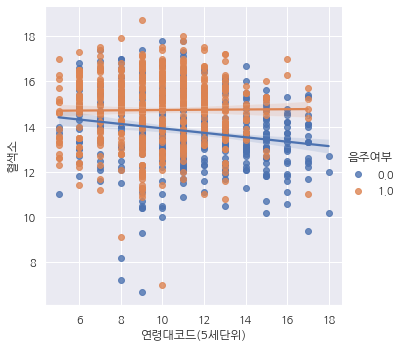

In [451]:
sns.lmplot(data=df_sample, x = '연령대코드(5세단위)', y='혈색소', hue='음주여부')

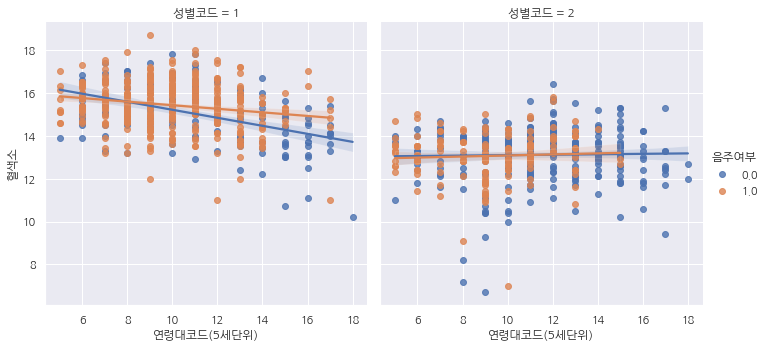

In [452]:
sns.lmplot(data=df_sample, x = '연령대코드(5세단위)', y='혈색소', hue='음주여부', col='성별코드')

### 4.10

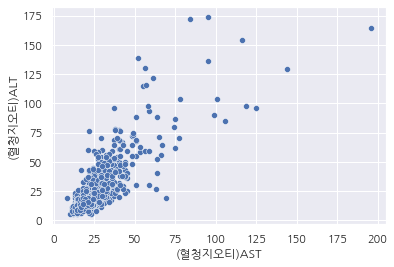

In [453]:
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT')

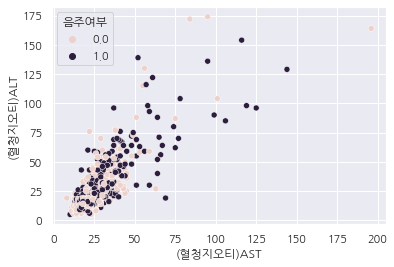

In [454]:
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부')

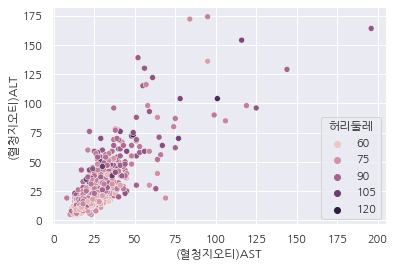

In [455]:
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='허리둘레')

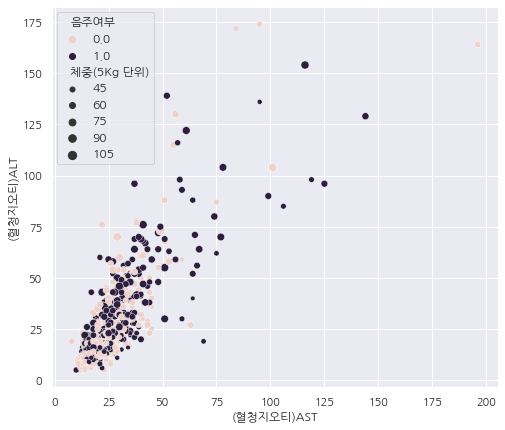

In [456]:
# size = 체중에 따라 원의 크기를 다르게 지정

plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', size='체중(5Kg 단위)')

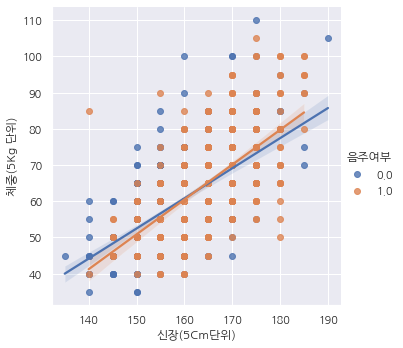

In [457]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부')

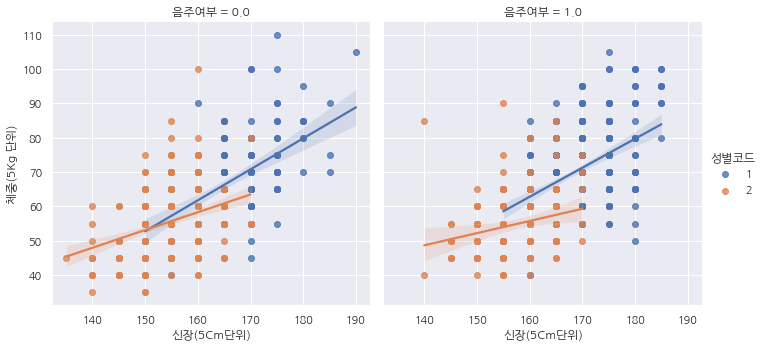

In [458]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='성별코드', col='음주여부')

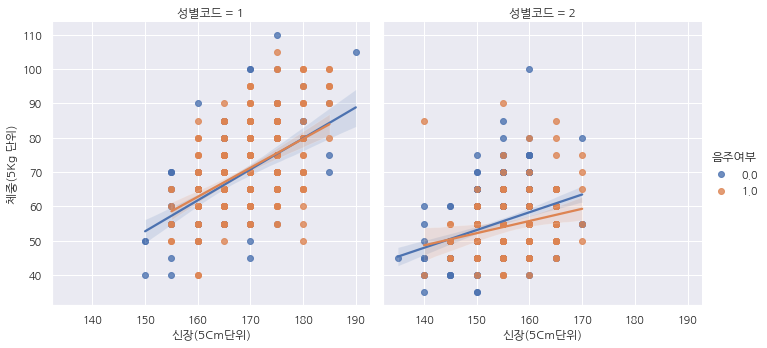

In [459]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='음주여부', col='성별코드')

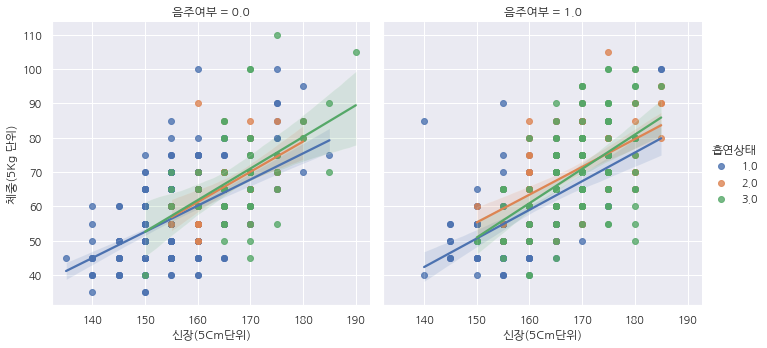

In [460]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='흡연상태', col='음주여부')

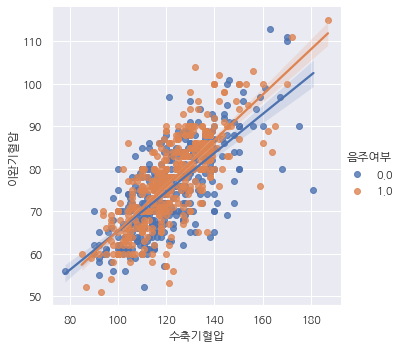

In [461]:
sns.lmplot(data=df_sample, x='수축기혈압', y='이완기혈압', hue='음주여부')

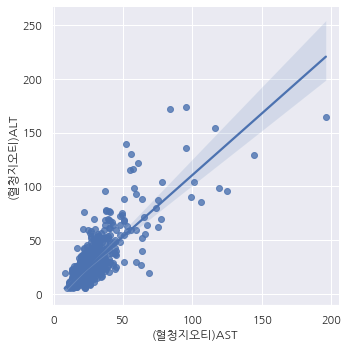

In [462]:
sns.lmplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT')

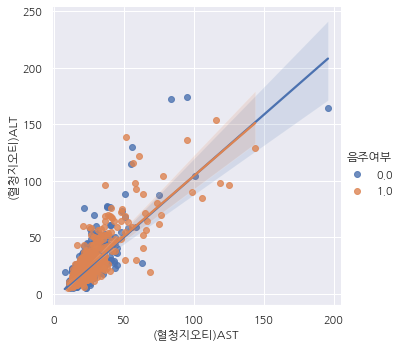

In [463]:
# robust = True : 이상치를 제외하고 그림

sns.lmplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', robust=True)

이상치 다루기 

In [464]:
df_ASLT = df_sample[(df_sample['(혈청지오티)AST'] < 400) & (df_sample['(혈청지오티)ALT'] < 400)]
df_ASLT

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
276826,2017,276827,2,12,11,155.0,85.0,113.0,0.7,1.0,...,35.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
849425,2017,849426,2,15,11,155.0,45.0,73.0,0.5,0.4,...,19.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
504499,2017,504500,1,11,47,170.0,45.0,63.0,0.7,0.4,...,15.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
601054,2017,601055,2,16,26,150.0,50.0,77.0,0.4,0.3,...,13.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
980221,2017,980222,2,13,41,150.0,65.0,95.0,1.0,0.8,...,265.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2017,890014,2,11,29,155.0,50.0,65.1,1.0,0.8,...,22.0,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
875389,2017,875390,2,9,11,155.0,45.0,66.5,0.9,0.8,...,12.0,1.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
358458,2017,358459,2,11,11,160.0,50.0,72.0,0.9,0.8,...,11.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
808228,2017,808229,1,9,48,175.0,65.0,75.2,1.2,1.2,...,122.0,3.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126


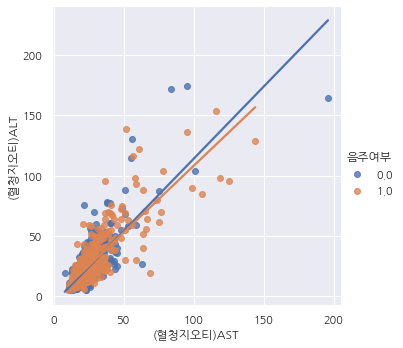

In [469]:
sns.lmplot(data=df_ASLT, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None)

In [478]:
df_ASLT_high = df[(df['(혈청지오티)AST'] > 400) | (df['(혈청지오티)ALT'] > 400)]
df_ASLT_high

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
2771,2017,2772,1,8,44,170.0,65.0,82.2,1.0,0.9,...,280.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
5047,2017,5048,1,7,31,170.0,60.0,77.0,1.5,1.5,...,33.0,1.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
10803,2017,10804,1,10,46,170.0,75.0,83.1,0.7,1.0,...,228.0,3.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
14948,2017,14949,1,5,47,180.0,130.0,110.0,1.2,1.5,...,115.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
16433,2017,16434,2,12,44,160.0,65.0,86.0,1.0,1.0,...,672.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990160,2017,990161,1,13,11,170.0,70.0,85.0,0.8,0.8,...,626.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
990909,2017,990910,1,9,48,165.0,80.0,95.0,1.5,1.5,...,34.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
991596,2017,991597,2,16,48,150.0,40.0,67.0,0.7,0.6,...,39.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
996864,2017,996865,2,7,44,155.0,45.0,69.0,1.2,1.5,...,490.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


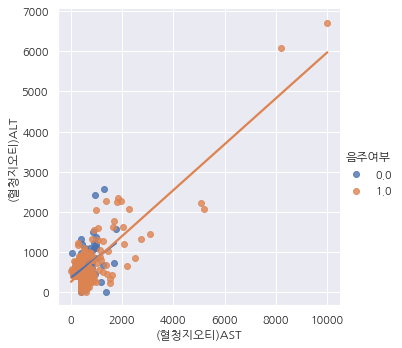

In [479]:
sns.lmplot(data=df_ASLT_high, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None) 

In [480]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high['(혈청지오티)AST'] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
677177,2.0,2.0,100.0,60.0,107.0,129.0,152.0,30.0,69.0,13.0,1.0,1.2,8200.0,6080.0,888.0,1.0,1.0
887237,1.0,1.0,97.0,71.0,86.0,158.0,111.0,100.0,35.0,17.8,3.0,0.8,9999.0,6710.0,379.0,3.0,1.0


### 4.11 distplot 
- 결측치가 없으면 그릴 수 없음

In [481]:
df_chol = df.loc[df['총콜레스테롤'].notnull(), '총콜레스테롤']
df_chol.head()

0    178.0
1    255.0
2    211.0
3    160.0
4    253.0
Name: 총콜레스테롤, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


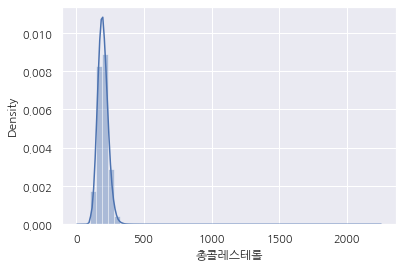

In [482]:
sns.distplot(df_chol)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


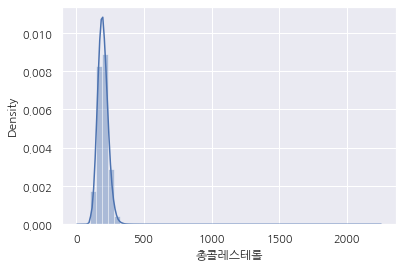

In [483]:
sns.distplot(df_chol)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


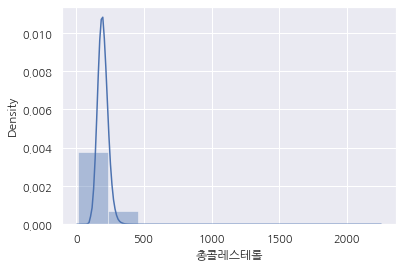

In [484]:
sns.distplot(df_chol, bins = 10)

In [486]:
df[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1)]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
5,2017,6,1,8,11,170.0,70.0,84.8,1.2,1.0,...,33.0,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
6,2017,7,1,8,48,175.0,110.0,111.5,1.0,1.0,...,45.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
9,2017,10,1,8,11,170.0,70.0,86.0,1.0,1.0,...,88.0,1.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
18,2017,19,1,8,30,175.0,80.0,88.0,0.8,0.8,...,18.0,2.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2017,999993,2,5,30,160.0,50.0,68.1,1.0,1.0,...,15.0,3.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
999993,2017,999994,1,8,47,175.0,95.0,88.0,1.2,1.5,...,93.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999994,2017,999995,1,10,41,165.0,85.0,98.0,0.7,0.9,...,66.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


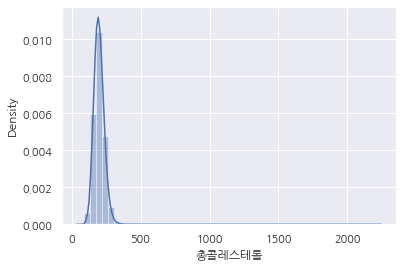

In [487]:
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1), '총콜레스테롤'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


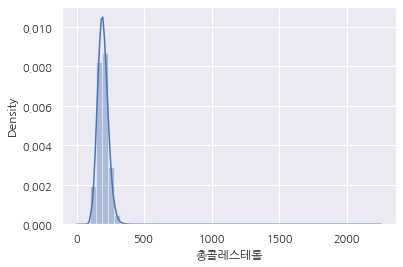

In [488]:
sns.distplot(df.loc[(df['총콜레스테롤'].notnull()) & (df['음주여부'] == 0), '총콜레스테롤'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


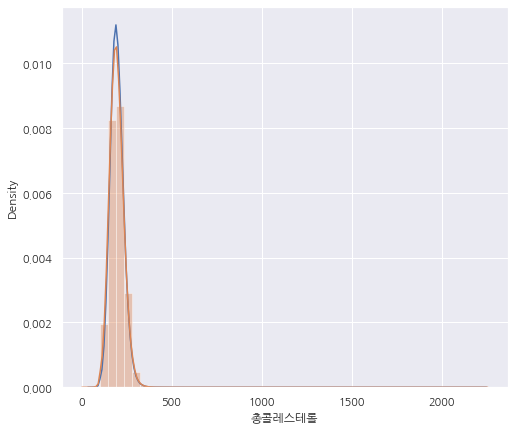

In [493]:
# hist = False: 선만 나오게 함

plt.figure(figsize=(8, 7))
sns.distplot(df.loc[(df['총콜레스테롤'].notnull()) & (df['음주여부'] == 1), '총콜레스테롤'], hist=False) 
sns.distplot(df.loc[(df['총콜레스테롤'].notnull()) & (df['음주여부'] == 0), '총콜레스테롤'])

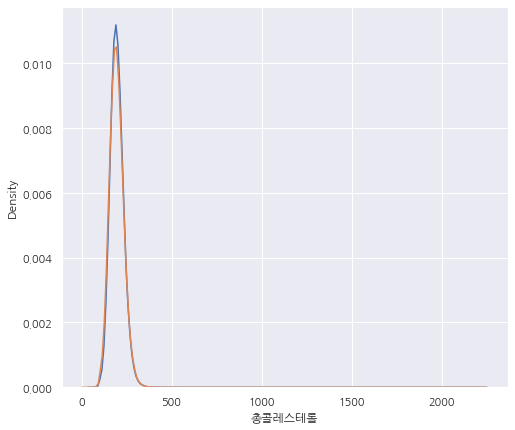

In [509]:
# label을 넣어서 설명 가능 

plt.figure(figsize=(8, 7))
sns.kdeplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1), '총콜레스테롤'], label = '음주 중') 
sns.kdeplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 0), '총콜레스테롤'], label = '음주 안 함')

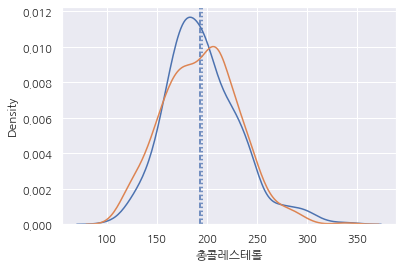

In [510]:
# axvline은 평균값과 중앙값을 선으로 그리기 위해 채택
# kdeplot: 확률밀도함수를 그림

plt.axvline(df_sample['총콜레스테롤'].mean(), linestyle=':')
plt.axvline(df_sample['총콜레스테롤'].median(), linestyle='--')
sns.kdeplot(df_sample.loc[(df_sample['총콜레스테롤'].notnull()) & (df['음주여부'] == 1), '총콜레스테롤'], label='음주 중')
sns.kdeplot(df_sample.loc[(df_sample['총콜레스테롤'].notnull()) & (df['음주여부'] == 0), '총콜레스테롤'], label='음주 안 함')

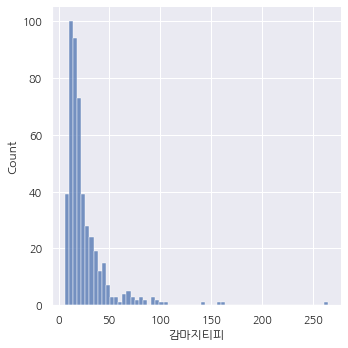

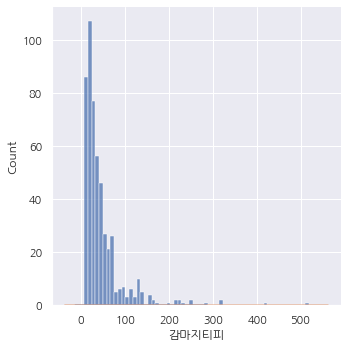

In [514]:
s_0 = df_sample.loc[df_sample['음주여부'] == 0, '감마지티피']
s_1 = df_sample.loc[df_sample['음주여부'] == 1, '감마지티피']

sns.displot(s_0, label='음주 안 함')
sns.displot(s_1, label='음주 중')
sns.kdeplot(s_0, label='음주 안 함')
sns.kdeplot(s_1, label='음주 중')

### 4.12